
# Wine Dataset — Feature Importance Comparisons (RF vs DT vs Bagging)

This notebook has **four parts**:

1. **MDI (impurity-based) feature importance:** compare a **Random Forest** (RF) and a **single Decision Tree (DT, Gini)**.  
   *Main takeaway:* a single tree tends to **concentrate** importance on just a few splits, while a forest **spreads** importance more broadly—typical because ensembles average many different split patterns.
2. **Random Forest: MDI vs Permutation importance**.
3. **Permutation importance:** compare **Random Forest** vs **Decision Tree**.
4. **Features analysis:** compare **Random Forest** vs **Bagging**.


## Load and prepare data

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from scipy.stats import spearmanr

plt.rcParams.update({'figure.figsize': (8,5), 'axes.grid': True})


In [9]:

# Data
data = load_wine()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

X.shape, len(feature_names)


((178, 13), 13)

## 1. Train a random forest and a decision tree

Compute their test accuracies.

Random Forest test accuracy: 1.000
Decision Tree  test accuracy: 0.956


## 2. Visualise trees in the random forest

Visualise a few trees in the random forest and compare the features employed at the top splits. Limit the depth to facilitate visualisation.

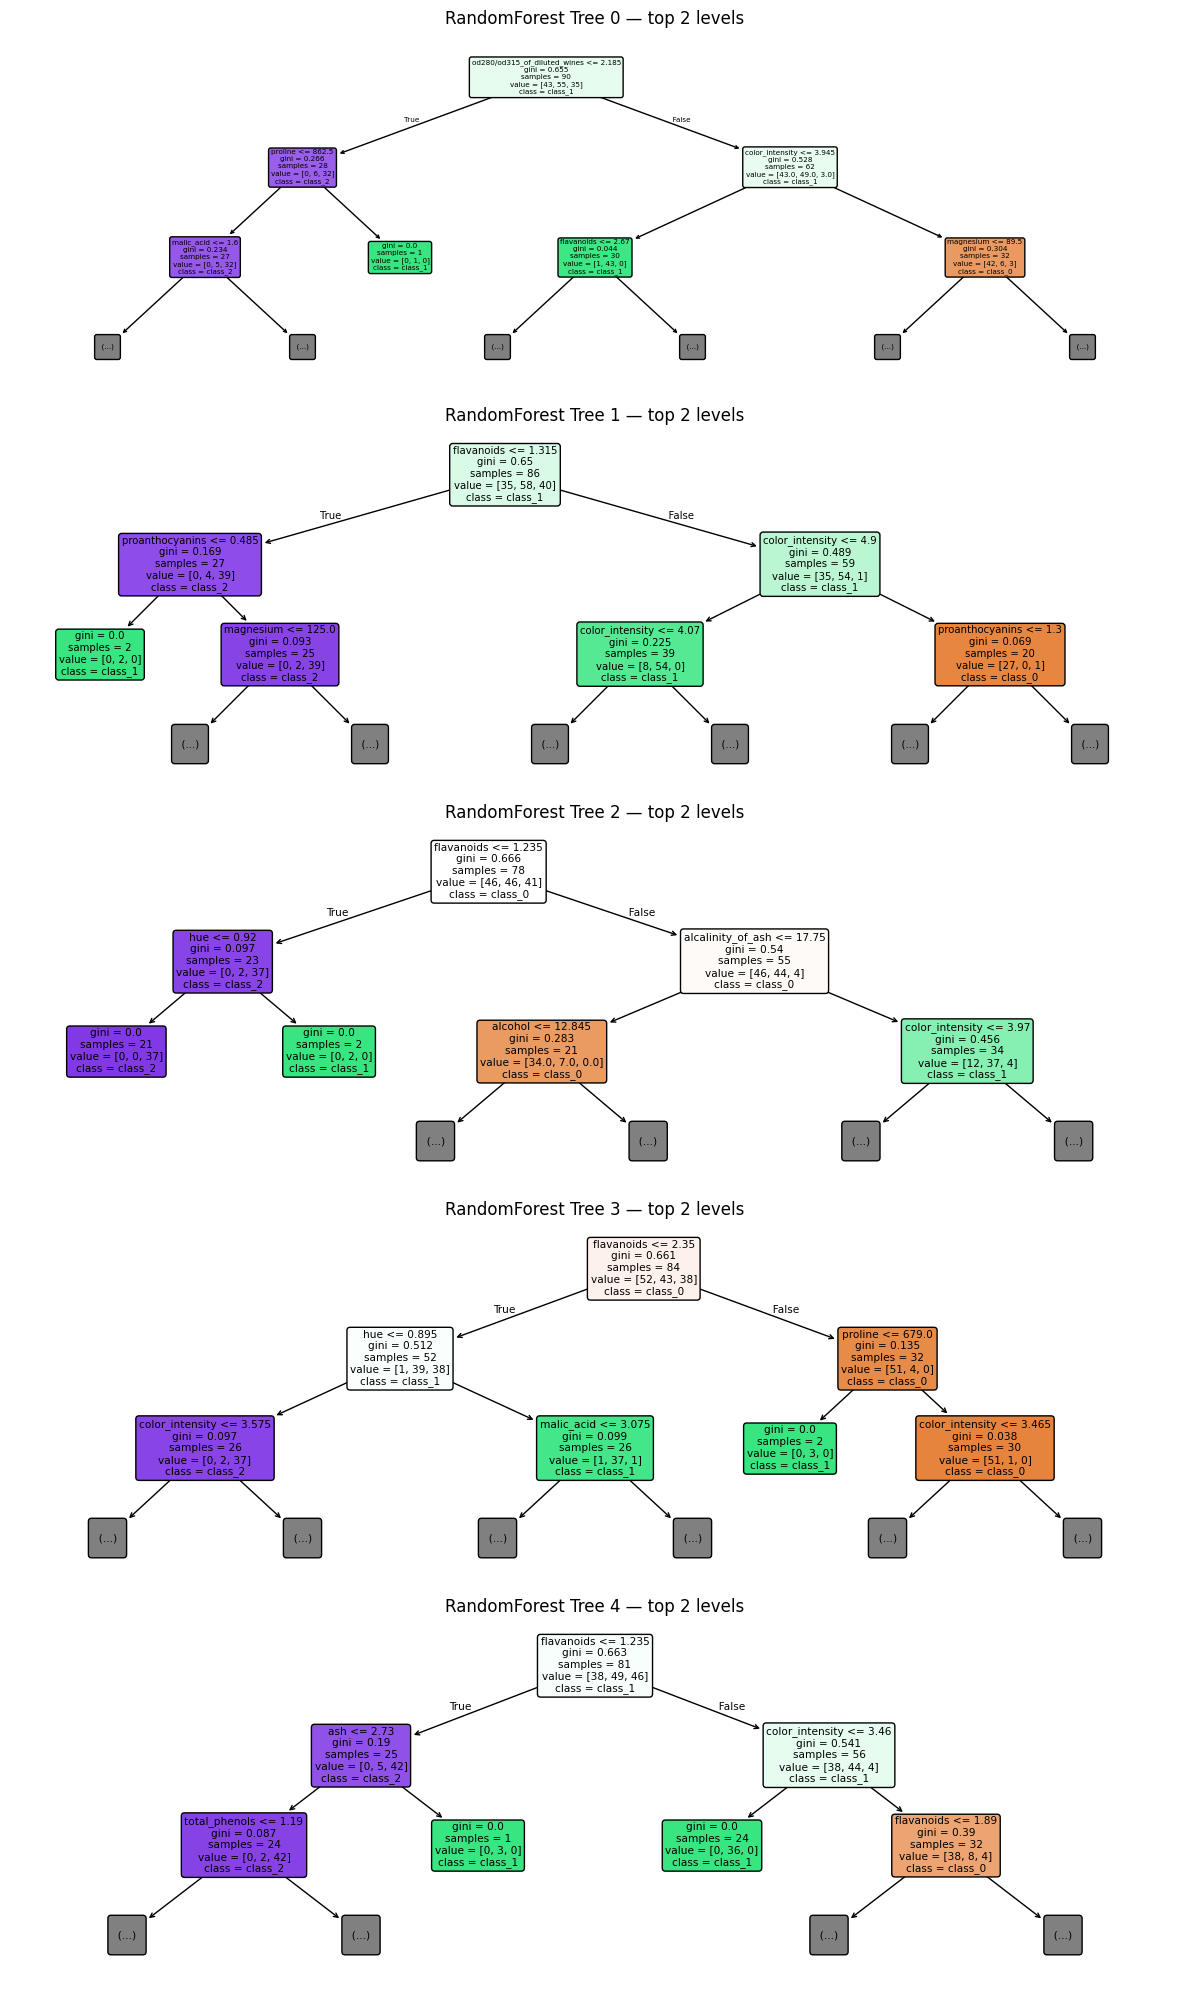

## 3. MDI (impurity-based) feature importance — Random Forest vs Decision Tree

- Conduct feature analysis for the features in the random forest and the decision tree using Mean Decrease Impurity (MDI). You can access the feature importances of the random forest and the decision tree with feature_importances_ (e.g., tree.feature_importances_, or forest.feature_importances_) 
- Compare feature importances: what do you observe? 

Spearman rank corr (RF MDI vs DT MDI): rho=0.526, p=0.0649


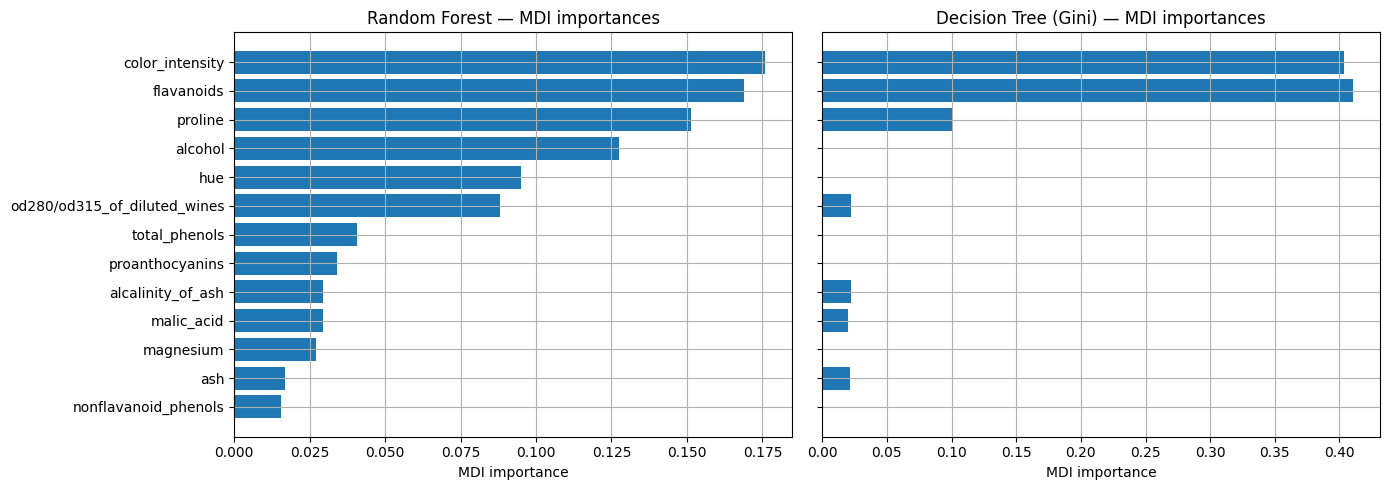


**Conclusions (Part 1):**  
- As to the feature analysis....
- As to the Spearman rank correlation...


## 4. Random Forest — MDI vs Permutation importance

Spearman (RF MDI vs RF Perm): rho=0.743, p=0.00364


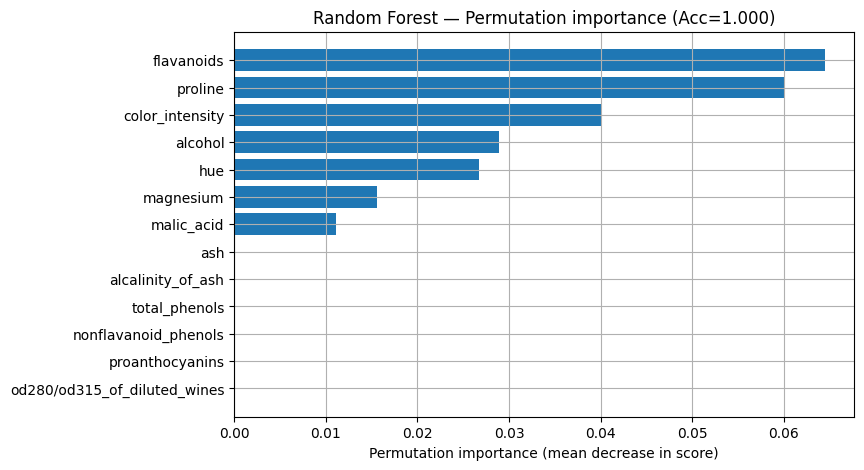

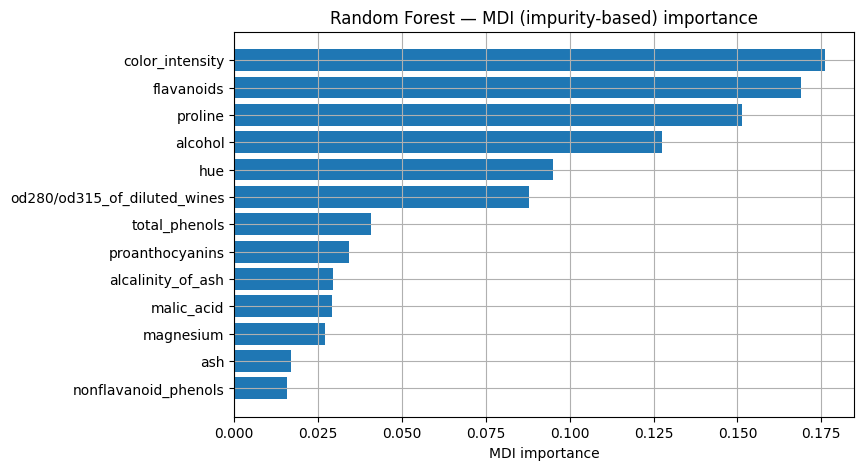


**Conclusions (Part 2):**  
- As to the difference between permutation importance and MDI...

## 5. Permutation importance — Random Forest vs Decision Tree

Spearman (RF Perm vs DT Perm): rho=0.451, p=0.122


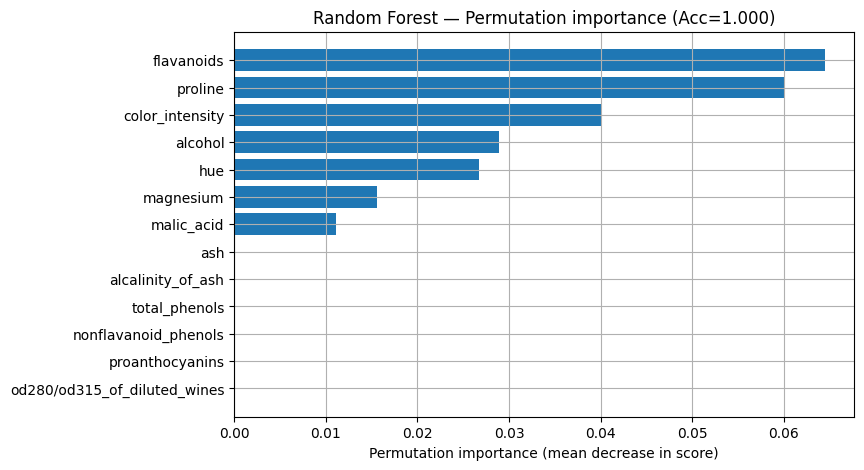

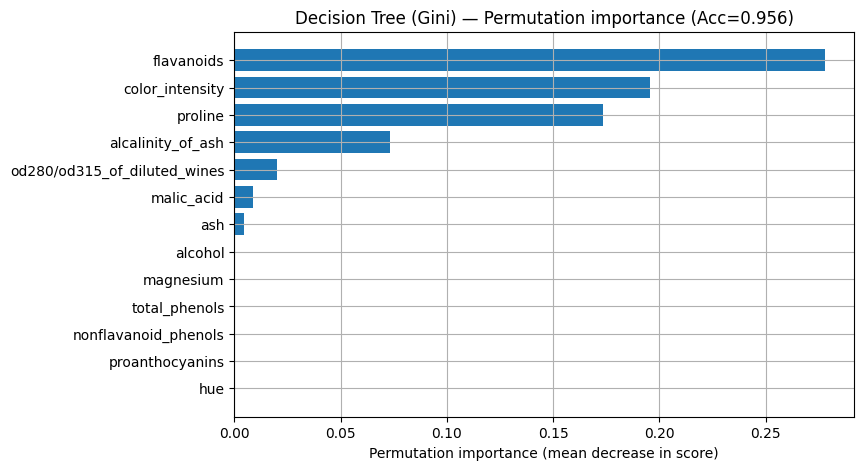


**Conclusions (Part 3):**  


## 6. Feature analysis: Random Forest vs Bagging

Let's consider an example using the Wine dataset that compares MDI (impurity-based) feature importance from a BaggingClassifier (a bag of trees) versus a Random Forest. The key difference is that bagging allows each tree to consider all features at every split, whereas random forests subsample features at each split (e.g., sqrt(p)), which decorrelates trees and often spreads importance more broadly.

Test accuracy  — Bagging: 1.000 | RandomForest: 1.000
Spearman rank correlation (Bagging vs RF MDI): rho=0.764, p=0.00238

Top features by RF MDI:
                     feature  Bagging_MDI   RF_MDI
                  flavanoids     0.298593 0.168762
             color_intensity     0.335831 0.166957
                     proline     0.134846 0.143297
                     alcohol     0.075704 0.129551
                         hue     0.032567 0.101328
od280/od315_of_diluted_wines     0.080800 0.092843
               total_phenols     0.003492 0.046082
             proanthocyanins     0.001853 0.031669

Top features by Bagging MDI:
                     feature  Bagging_MDI   RF_MDI
             color_intensity     0.335831 0.166957
                  flavanoids     0.298593 0.168762
                     proline     0.134846 0.143297
od280/od315_of_diluted_wines     0.080800 0.092843
                     alcohol     0.075704 0.129551
                         hue     0.032567 0.101328
       

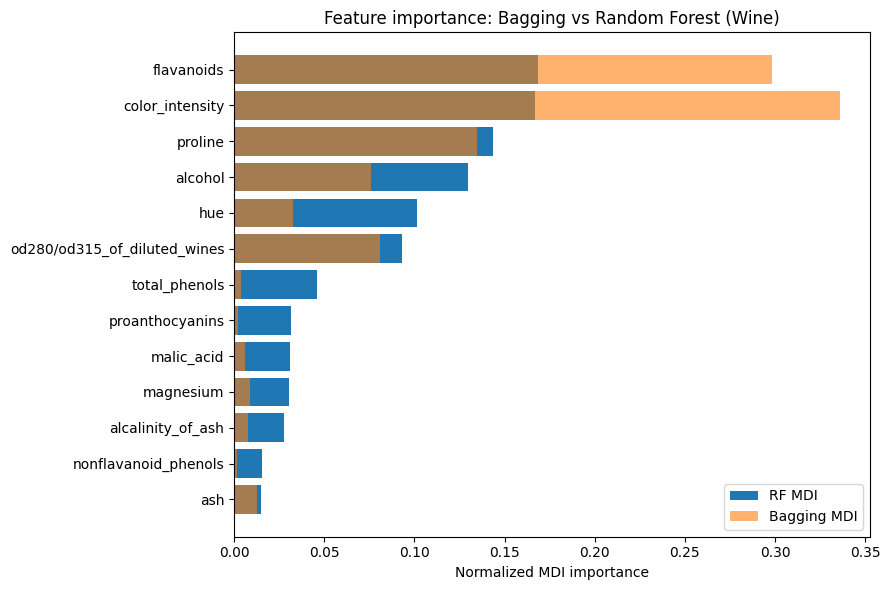

### Bagging vs. Random Forest — how feature importance typically differs

- **Random Forest**: importance is **more spread out** across features because each split considers only a **random subset of features**. This decorrelates trees and prevents any single predictor from dominating across the ensemble.

- **Bagging (bag of trees)**: each split can consider **all features**, so the ensemble can **concentrate importance** on a few strong predictors—especially if those features often appear near the top of trees.

- **Ranking agreement**: you’ll often see **moderate agreement** in the ordering of features (check the **Spearman ρ** printed by the code), but **Random Forests** usually **downweight single-feature dominance** compared to **Bagging** due to feature subsampling.


DO YOUR ANALYSIS ABOUT THIS CONCRETE CASE
